<a href="https://colab.research.google.com/github/AshfakMRM/CNN_Model/blob/master/disease_detection_tl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/train'
valid_path = '/content/drive/MyDrive/Datasets/test'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
folders = glob('/content/drive/MyDrive/Datasets/train/*')
len(folders) 

12

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 20467 images belonging to 12 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 4937 images belonging to 12 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
1280/1280 [==============================] - 7100s 6s/step - loss: 2.6584 - accuracy: 0.2963 - val_loss: 0.9852 - val_accuracy: 0.6605
Epoch 2/15
1280/1280 [==============================] - 309s 241ms/step - loss: 1.3398 - accuracy: 0.6284 - val_loss: 0.8602 - val_accuracy: 0.7300
Epoch 3/15
1280/1280 [==============================] - 307s 240ms/step - loss: 0.7844 - accuracy: 0.7482 - val_loss: 1.1901 - val_accuracy: 0.6407
Epoch 4/15
1280/1280 [==============================] - 308s 241ms/step - loss: 0.6029 - accuracy: 0.8009 - val_loss: 0.5392 - val_accuracy: 0.8303
Epoch 5/15
1280/1280 [==============================] - 307s 240ms/step - loss: 0.4962 - accuracy: 0.8393 - val_loss: 0.6144 - val_accuracy: 0.8507
Epoch 6/15
1280/1280 [==============================] - 307s 240ms/step - loss: 0.4168 - accuracy: 0.8662 - val_loss: 3.8625 - val_accuracy: 0.8661
Epoch 7/15
1280/1280 [==============================] - 307s 240ms/step - loss: 0.8513 - accuracy: 0.7313 - val_lo

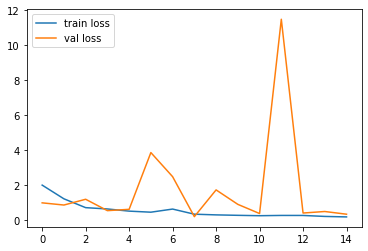

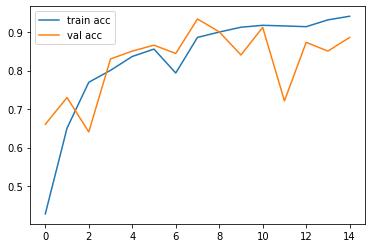

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

path : /content/model_inception.h5

In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('model_inception.h5')

# Show the model architecture
new_model.summary()

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('model_inception.h5')

# Show the model architecture
new_model.summary()